In [1]:
import pandas as pd

df = pd.read_csv("dataset-tiktok/label_indobert_tiktok.csv")

df.head()

,comment,case_folding,cleaning,normalisasi,tokenisasi,stopword_removal,stemming,score,sentiment_label,sentiment_encoded,bert_encoded,bert_label
0,"gedung elit, jaringan sulit.","gedung elit, jaringan sulit.",gedung elit jaringan sulit,gedung elit jaringan sulit,"['gedung', 'elit', 'jaringan', 'sulit']","['gedung', 'elit', 'jaringan', 'sulit']","['gedung', 'elit', 'jaring', 'sulit']",1,Positif,1,1,positif
1,mau ngeluh tapi cuman satu satunya bank syaria...,mau ngeluh tapi cuman satu satunya bank syaria...,mau ngeluh tapi cuman satu satunya bank syaria...,mau ngeluh tapi cuma satu satunya bank syariah...,"['mau', 'ngeluh', 'tapi', 'cuma', 'satu', 'sat...","['ngeluh', 'satunya', 'syariah', 'bumn']","['ngeluh', 'satu', 'syariah', 'bumn']",-1,Negatif,0,0,negatif
2,tim yg masih punya apk BSI lama😂😂😂😂,tim yg masih punya apk bsi lama😂😂😂😂,tim yg masih punya apk bsi lama,tim yang masih punya aplikasi bsi lama,"['tim', 'yang', 'masih', 'punya', 'aplikasi', ...","['tim', 'aplikasi']","['tim', 'aplikasi']",-2,Negatif,0,0,negatif
3,"gw punya uang 2M lebih,ga percaya bank manapun...","gw punya uang 2m lebih,ga percaya bank manapun...",gw punya uang m lebihga percaya bank manapunma...,gue punya uang sama lebihga percaya bank manap...,"['gue', 'punya', 'uang', 'sama', 'lebihga', 'p...","['gue', 'uang', 'lebihga', 'percaya', 'manapun...","['gue', 'uang', 'lebihga', 'percaya', 'manapun...",-1,Negatif,0,0,negatif
4,semoga bank konfensional kembali membuka caban...,semoga bank konfensional kembali membuka caban...,semoga bank konfensional kembali membuka caban...,semoga bank konfensional kembali membuka caban...,"['semoga', 'bank', 'konfensional', 'kembali', ...","['semoga', 'konfensional', 'membuka', 'cabangn...","['moga', 'konfensional', 'buka', 'cabang', 'ac...",1,Positif,1,1,positif


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7853 entries, 0 to 7852
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   comment            7853 non-null   object
 1   case_folding       7853 non-null   object
 2   cleaning           7853 non-null   object
 3   normalisasi        7853 non-null   object
 4   tokenisasi         7853 non-null   object
 5   stopword_removal   7853 non-null   object
 6   stemming           7853 non-null   object
 7   score              7853 non-null   int64 
 8   sentiment_label    7853 non-null   object
 9   sentiment_encoded  7853 non-null   int64 
 10  bert_encoded       7853 non-null   int64 
 11  bert_label         7853 non-null   object
dtypes: int64(3), object(9)
memory usage: 736.3+ KB


In [23]:
df.columns

Index(['comment', 'case_folding', 'cleaning', 'normalisasi', 'tokenisasi',
       'stopword_removal', 'stemming', 'score', 'sentiment_label',
       'sentiment_encoded', 'bert_encoded', 'bert_label'],
      dtype='object')

In [ ]:
df["bert_label"].value_counts()

bert_label
negatif    5962
positif    1891
Name: count, dtype: int64

# Sentimen Positif Bertopic Tiktok

In [25]:
df_positif = df[df["bert_label"] == "positif"]
texts = df_positif["normalisasi"].astype(str).tolist()

In [26]:
df_positif = df[df["bert_label"] == "positif"]
len(df_positif)

1891

In [27]:
texts = (
    df_positif["normalisasi"]   # <--- ganti ke "comment" kalau cleaning kosong
    .dropna()
    .astype(str)
    .str.strip()
    .tolist()
)

# buang yang kosong banget
texts = [t for t in texts if len(t) > 0]

In [47]:
print(type(texts), len(texts))
print(type(texts[0]))
print(texts[223][:200])

<class 'list'> 1891
<class 'str'>
tadi saya transfer dari bpd ke bsi alhamdulillah langsung ada masuk rekening bsi


In [48]:
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer(
    "paraphrase-multilingual-mpnet-base-v2"
)

In [49]:
from bertopic import BERTopic

# 5) BERTopic
topic_model = BERTopic(
    embedding_model=embedding_model,
    language="indonesian",
    min_topic_size=40
)

topics, probs = topic_model.fit_transform(texts)

In [50]:
df_positif = df_positif.iloc[:len(topics)].copy()
df_positif["topic"] = topics

In [51]:
topic_counts = (
    df_positif["topic"]
    .value_counts()
    .reset_index()
)

topic_counts.columns = ["topic_id", "jumlah_data"]
topic_counts

,topic_id,jumlah_data
0,0,1651
1,-1,131
2,1,109


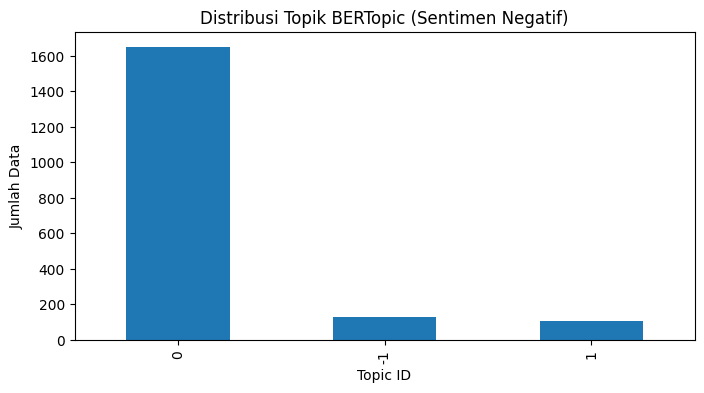

In [52]:
import matplotlib.pyplot as plt

topic_counts.plot(
    x="topic_id",
    y="jumlah_data",
    kind="bar",
    figsize=(8,4),
    legend=False
)
plt.title("Distribusi Topik BERTopic (Sentimen Negatif)")
plt.xlabel("Topic ID")
plt.ylabel("Jumlah Data")
plt.show()

In [54]:
topic_model.get_topic(0)

[('bsi', np.float64(0.0787060739761842)),
 ('bisa', np.float64(0.06483559807201023)),
 ('di', np.float64(0.06069334965593119)),
 ('ya', np.float64(0.0589807238533882)),
 ('ke', np.float64(0.05721583372604656)),
 ('akun', np.float64(0.05664540664836688)),
 ('kak', np.float64(0.05643132184991336)),
 ('sudah', np.float64(0.0509039872438545)),
 ('saldo', np.float64(0.04704071754934024)),
 ('tidak', np.float64(0.04534741289328196))]

In [55]:
df_positif.to_csv("output/hasil_bertopic_positif_tiktok.csv", index=False)

topic_info = topic_model.get_topic_info()
topic_info.to_csv("output/topic_info_positif_tiktok.csv", index=False)

# Sentimen Negatif Bertopic Tiktok

In [4]:
df_negatif = df[df["bert_label"] == "negatif"]
texts = df_negatif["normalisasi"].astype(str).tolist()

In [6]:
df_negatif = df[df["bert_label"] == "negatif"]
len(df_negatif)

5962

In [7]:
texts = (
    df_negatif["cleaning"]   # <--- ganti ke "comment" kalau cleaning kosong
    .dropna()
    .astype(str)
    .str.strip()
    .tolist()
)

# buang yang kosong banget
texts = [t for t in texts if len(t) > 0]

In [8]:
print(type(texts), len(texts))
print(type(texts[0]))
print(texts[0][:200])

<class 'list'> 5962
<class 'str'>
mau ngeluh tapi cuman satu satunya bank syariah bumn


In [9]:
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer(
    "paraphrase-multilingual-mpnet-base-v2"
)

W0108 10:26:46.884000 30024 site-packages\torch\distributed\elastic\multiprocessing\redirects.py:29] NOTE: Redirects are currently not supported in Windows or MacOs.
c:\Users\bayuw\.conda\envs\sentimen\lib\site-packages\huggingface_hub\file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [10]:
from bertopic import BERTopic

# 5) BERTopic
topic_model = BERTopic(
    embedding_model=embedding_model,
    language="indonesian",
    min_topic_size=40
)

topics, probs = topic_model.fit_transform(texts)

In [11]:
df_negatif = df_negatif.iloc[:len(topics)].copy()
df_negatif["topic"] = topics

In [18]:
topic_counts = (
    df_negatif["topic"]
    .value_counts()
    .reset_index()
)

topic_counts.columns = ["topic_id", "jumlah_data"]
topic_counts

,topic_id,jumlah_data
0,0,2927
1,1,2312
2,2,159
3,3,111
4,4,92
5,-1,85
6,5,75
7,6,73
8,7,44
9,8,43


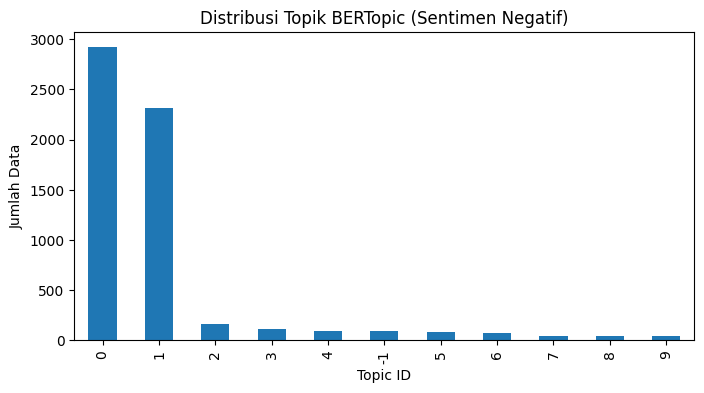

In [19]:
import matplotlib.pyplot as plt

topic_counts.plot(
    x="topic_id",
    y="jumlah_data",
    kind="bar",
    figsize=(8,4),
    legend=False
)
plt.title("Distribusi Topik BERTopic (Sentimen Negatif)")
plt.xlabel("Topic ID")
plt.ylabel("Jumlah Data")
plt.show()

In [16]:
topic_model.get_topic(0)

[('bsi', np.float64(0.039706250178155704)),
 ('di', np.float64(0.03856682156947167)),
 ('bisa', np.float64(0.03440114043552714)),
 ('ke', np.float64(0.032474344740134324)),
 ('bank', np.float64(0.03066732188662448)),
 ('nya', np.float64(0.028860807486287922)),
 ('ga', np.float64(0.028851987734766833)),
 ('ada', np.float64(0.02774927998398117)),
 ('aku', np.float64(0.026753915887476873)),
 ('uang', np.float64(0.026577013198266834))]

In [22]:
df_negatif.to_csv("output/hasil_bertopic_negatif_tiktok.csv", index=False)

topic_info = topic_model.get_topic_info()
topic_info.to_csv("output/topic_info_negatif_tiktok.csv", index=False)